## Import Librabries and Load Data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

## import model objects
from sklearn.model_selection import train_test_split
import yfinance as yf

from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("../Data/dataset_others_class.csv")

In [3]:
df.dtypes

Date                   object
CADUSD=X_Open         float64
CADUSD=X_Close        float64
CADUSD=X_High         float64
CADUSD=X_Low          float64
                       ...   
F_ROC                 float64
F_PVT                 float64
F_Bollinger_Upper     float64
F_Bollinger_Lower     float64
F_Close_pred_class      int64
Length: 155, dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [5]:
df.describe()

,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,...,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower,F_Close_pred_class
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.0,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,...,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03,1237.000000,1237.000000,1237.000000
mean,0.758633,0.758637,0.760732,0.756380,0.0,-0.000026,0.001221,0.001247,0.001222,0.001246,...,50.709762,49.819518,-50.180482,0.010772,0.010580,0.740316,9.941460e+07,13.119785,10.870765,0.489086
std,0.028260,0.028256,0.028313,0.028251,0.0,0.003274,0.001931,0.001986,0.000539,0.000647,...,17.235668,30.409753,30.409753,0.421543,0.395604,10.283284,6.203849e+07,3.942885,3.134942,0.500083
min,0.690026,0.689741,0.693371,0.681826,0.0,-0.012518,0.000000,0.000000,0.000048,0.000016,...,8.700013,0.000000,-100.000000,-1.071207,-0.953758,-40.504446,-8.287094e+07,5.333265,3.663582,0.000000
25%,0.736106,0.736106,0.738007,0.734338,0.0,-0.001900,0.000000,0.000000,0.000861,0.000809,...,39.339368,22.988487,-77.011513,-0.208349,-0.203198,-5.059206,6.629778e+07,11.077180,9.076939,0.000000
50%,0.752117,0.752049,0.753517,0.750047,0.0,-0.000024,0.000000,0.000024,0.001170,0.001165,...,50.068922,48.951025,-51.048975,0.005962,0.010275,0.195786,1.172903e+08,13.086324,11.188883,0.000000
75%,0.783644,0.783576,0.786046,0.780665,0.0,0.001853,0.001853,0.001900,0.001554,0.001513,...,63.233880,78.135583,-21.864417,0.241499,0.230694,6.650648,1.374546e+08,14.868315,12.244718,1.000000
max,0.830599,0.830703,0.832778,0.829009,0.0,0.012381,0.012381,0.012518,0.003353,0.004876,...,92.692054,100.000000,-0.000000,1.382432,1.213766,38.490564,2.332063e+08,26.710337,19.065638,1.000000


In [6]:
df = df.rename(columns={'F_Close_pred_class': 'F_prediction'})

In [7]:
df.columns

Index(['Date', 'CADUSD=X_Open', 'CADUSD=X_Close', 'CADUSD=X_High',
       'CADUSD=X_Low', 'CADUSD=X_Volume', 'CADUSD=X_Change', 'CADUSD=X_Gain',
       'CADUSD=X_Loss', 'CADUSD=X_Avg_Gain',
       ...
       'F_RSI', 'F_k_percent', 'F_r_percent', 'F_MACD', 'F_MACD_EMA', 'F_ROC',
       'F_PVT', 'F_Bollinger_Upper', 'F_Bollinger_Lower', 'F_prediction'],
      dtype='object', length=155)

In [8]:
## Remove open, close, high, low, vol columns
open_cols = [col for col in df.columns if '_Open' in col]
close_cols = [col for col in df.columns if '_Close' in col]
high_cols = [col for col in df.columns if '_High' in col]
low_cols = [col for col in df.columns if '_Low' in col]
vol_cols = [col for col in df.columns if '_Volume' in col]

df = df.drop(columns=open_cols)
df = df.drop(columns=close_cols)
df = df.drop(columns=high_cols)
df = df.drop(columns=low_cols)
df = df.drop(columns=vol_cols)

#df

In [9]:
df.head()

,Date,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,CADUSD=X_SMA,CADUSD=X_EMA,CADUSD=X_change_in_price,CADUSD=X_RSI,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_prediction
0,2019-11-26 00:00:00+00:00,-0.000418,0.000000,0.000418,0.000289,0.000910,0.756581,0.756180,-0.000418,27.821853,...,0.01,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,1
1,2019-11-27 00:00:00+00:00,0.001932,0.001932,0.000000,0.000427,0.000767,0.756063,0.755938,0.001932,42.880806,...,0.09,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,0
2,2019-11-29 00:00:00+00:00,-0.000607,0.000000,0.000607,0.000427,0.000641,0.755736,0.755661,-0.000607,39.864127,...,-0.04,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,0
3,2019-12-02 00:00:00+00:00,-0.000238,0.000000,0.000238,0.000419,0.000658,0.755404,0.755387,-0.000238,38.634678,...,-0.05,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,0
4,2019-12-03 00:00:00+00:00,-0.001081,0.000000,0.001081,0.000419,0.000707,0.754937,0.755037,-0.001081,33.260985,...,-0.12,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,1


In [10]:
correlation_matrix = df.corr()

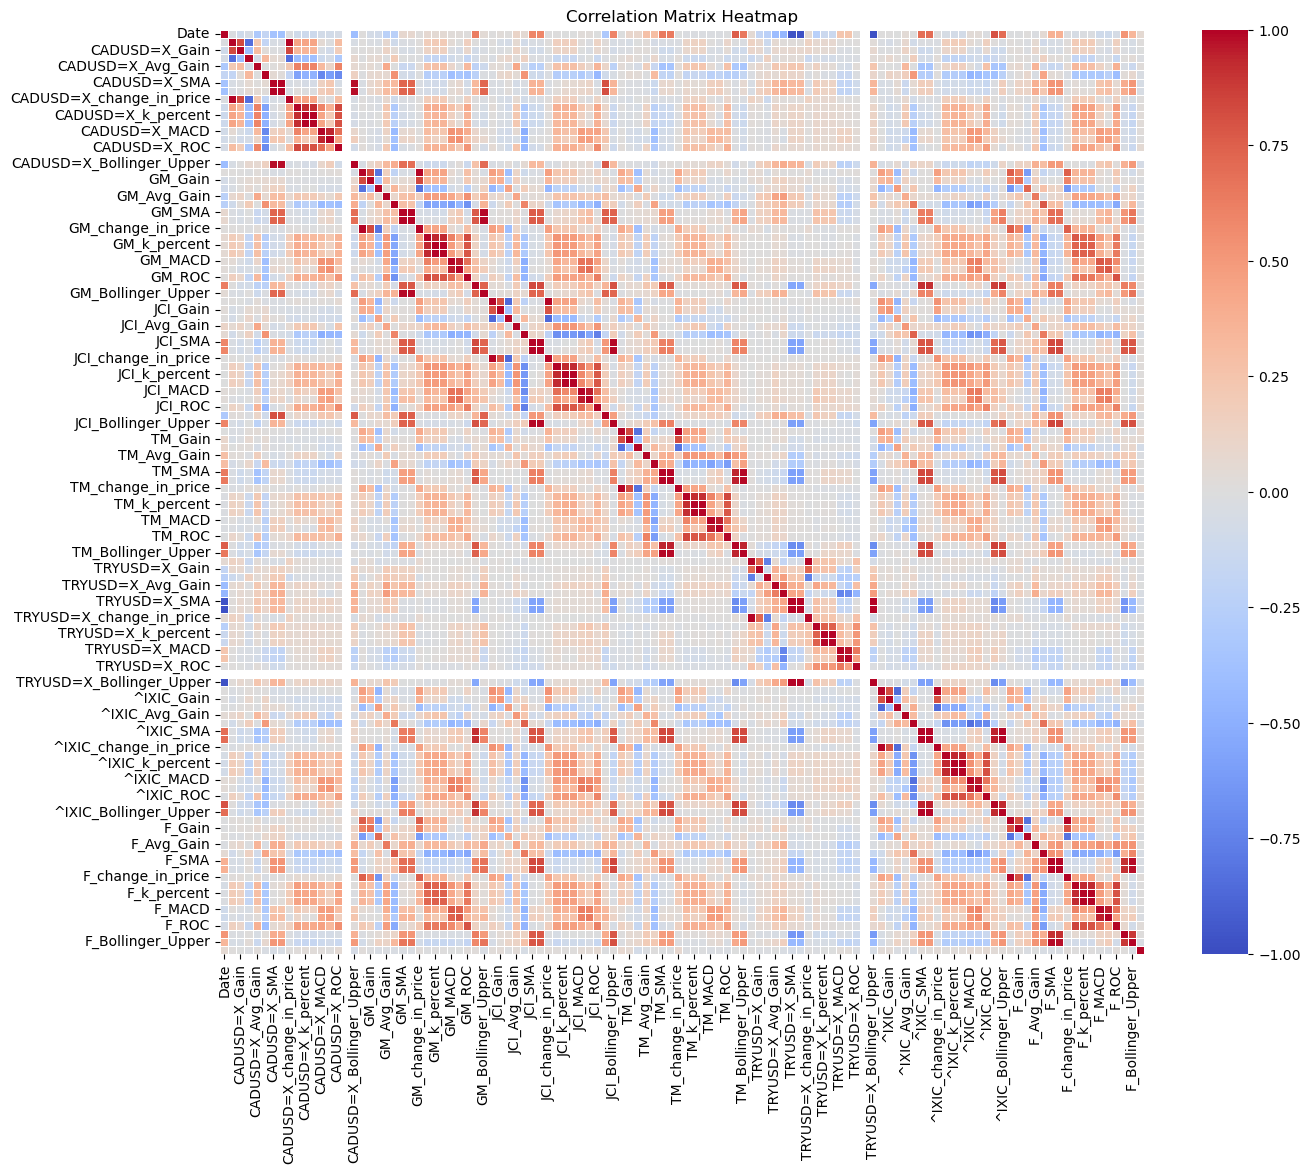

In [11]:
# Check for correlation
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [12]:
# Setting a threshold for multicollinearity to identify highly correlated features
threshold = 1
# Identifying highly correlated pairs
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Remove self-correlation (1.0)

# Identify columns to drop to reduce multicollinearity
columns_to_drop = set()
for (feature1, feature2), corr_value in high_corr_pairs.items():
    if corr_value > threshold:
        # Only add feature2 to drop if feature1 has not already been marked for removal
        if feature1 not in columns_to_drop:
            columns_to_drop.add(feature2)

# Dropping the identified columns from the dataset
df_new = df.drop(columns=columns_to_drop)


## Train-Test model

In [13]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import  precision_score, recall_score, f1_score

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
features = df_new.columns.difference(['Date', 'F_prediction'])
target = 'F_prediction'

In [16]:
# Define the Time Series Split 
tscv = TimeSeriesSplit(n_splits=10)

# Store the indices of each training and test set for visualization and confirmation
time_series_splits = []
for train_index, test_index in tscv.split(df_new):
    time_series_splits.append((train_index, test_index))

In [17]:
# Initialize a list to store accuracy results for each split
accuracies = []

# Step 4: Train a single KNN model with default parameters on each split and evaluate accuracy
for i, (train_index, test_index) in enumerate(time_series_splits):
    

    # Split the data into train and test sets based on indices
    X_train, X_test = df_new.iloc[train_index][features], df_new.iloc[test_index][features]
    y_train, y_test = df_new.iloc[train_index][target], df_new.iloc[test_index][target]
    
    # Apply scaling on the training data and then apply the same scaler on the test data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply Power Transformation on the scaled data
    power_transformer = PowerTransformer()
    X_train_transformed = power_transformer.fit_transform(X_train_scaled)
    X_test_transformed = power_transformer.transform(X_test_scaled)
    
    # Initialize KNN model with default k=5
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_transformed, y_train)
    
    # Predict on test set and calculate accuracy
    y_pred = knn.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

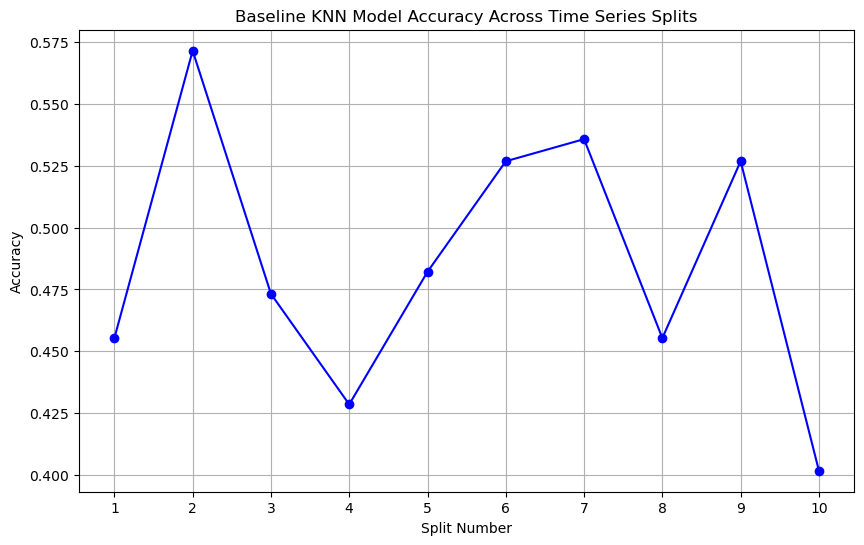

In [18]:
# Plot accuracy for each split
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title("Baseline KNN Model Accuracy Across Time Series Splits")
plt.xlabel("Split Number")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(accuracies) + 1))
plt.grid(True)
plt.show()

Try with different k

In [19]:
k_values = range(3, 21,2)
k_accuracies_transformed_tuned = []  # Store average accuracy for each k

# Loop through each k-value and perform cross-validation with scaling and transformation inside each split
for k in k_values:
    split_accuracies = []
    
    # Train and evaluate KNN for each time series split
    for train_index, test_index in tscv.split(df_new):
        # Define training and testing sets
        X_train, X_test = df_new.iloc[train_index][features], df_new.iloc[test_index][features]
        y_train, y_test = df_new.iloc[train_index][target], df_new.iloc[test_index][target]
        
        # Apply scaling on the training data and then apply the same scaler on the test data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Apply Power Transformation on the scaled data
        power_transformer = PowerTransformer()
        X_train_transformed = power_transformer.fit_transform(X_train_scaled)
        X_test_transformed = power_transformer.transform(X_test_scaled)
        
        # Initialize KNN with current k-value
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_transformed, y_train)
        
        # Predict and evaluate accuracy on test set
        y_pred = knn.predict(X_test_transformed)
        accuracy = accuracy_score(y_test, y_pred)
        split_accuracies.append(accuracy)
    
    # Calculate and store the average accuracy for this k-value
    k_accuracies_transformed_tuned.append(sum(split_accuracies) / len(split_accuracies))

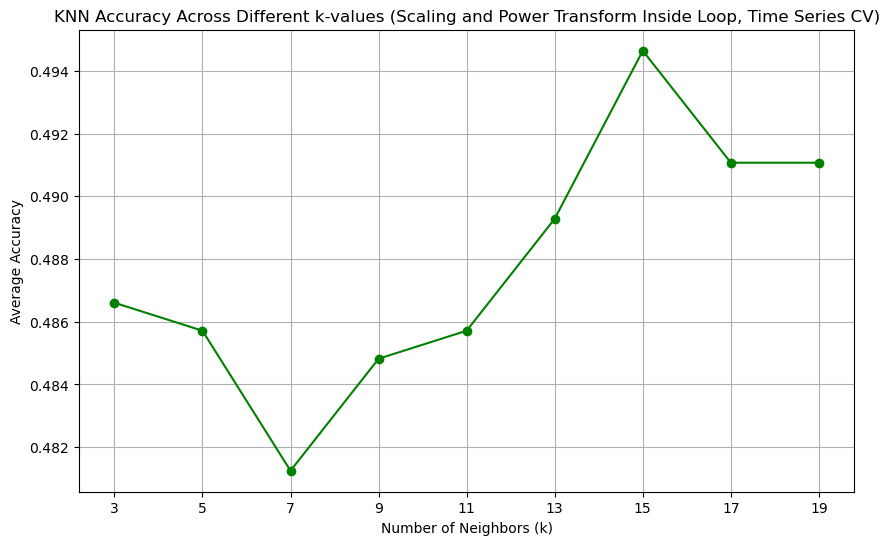

In [20]:
# Plot the accuracy for each k-value on transformed data with scaling inside the loop
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_accuracies_transformed_tuned, marker='o', linestyle='-', color='g')
plt.title("KNN Accuracy Across Different k-values (Scaling and Power Transform Inside Loop, Time Series CV)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Average Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [21]:
# Expanded parameter grid for GridSearch with k, distance metric, and weighting scheme
param_grid_expanded = {
    'n_neighbors': list(range(3, 21,2)),  # Testing k from 1 to 20
    'metric': ['euclidean', 'manhattan'],  # Different distance metrics
    'weights': ['uniform', 'distance']     # Different weighting schemes
}


In [22]:
# Initialize a dictionary to store accuracy for each parameter combination
grid_scores = {}
# Custom grid search implementation with expanded parameters
for k in param_grid_expanded['n_neighbors']:
    for metric in param_grid_expanded['metric']:
        for weight in param_grid_expanded['weights']:
            key = (k, metric, weight)
            grid_scores[key] = []
            
            # Perform time series split and evaluate each parameter set
            for train_index, test_index in tscv.split(df_new):
                X_train, X_test = df_new.iloc[train_index][features], df_new.iloc[test_index][features]
                y_train, y_test = df_new.iloc[train_index][target], df_new.iloc[test_index][target]
                
                # Scale and transform
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
                
                power_transformer = PowerTransformer()
                X_train_transformed = power_transformer.fit_transform(X_train_scaled)
                X_test_transformed = power_transformer.transform(X_test_scaled)

                # KNN model with current parameter set
                knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weight)
                knn.fit(X_train_transformed, y_train)

                # Accuracy calculation
                accuracy = accuracy_score(y_test, knn.predict(X_test_transformed))
                grid_scores[key].append(accuracy)

# Calculate average accuracy for each parameter combination
avg_expanded_scores = {key: sum(scores) / len(scores) for key, scores in grid_scores.items()}
best_params_expanded = max(avg_expanded_scores, key=avg_expanded_scores.get)



In [23]:
best_params_expanded

(17, 'manhattan', 'uniform')

In [24]:
knn_best = KNeighborsClassifier(
    n_neighbors=best_params_expanded[0],
    metric=best_params_expanded[1],
    weights=best_params_expanded[2]
)

In [29]:
accuracies = []

# Train the best KNN model and evaluate accuracy
for i, (train_index, test_index) in enumerate(time_series_splits):
    
    X_train, X_test = df_new.iloc[train_index][features], df_new.iloc[test_index][features]
    y_train, y_test = df_new.iloc[train_index][target], df_new.iloc[test_index][target]
    

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    power_transformer = PowerTransformer()
    X_train_transformed = power_transformer.fit_transform(X_train_scaled)
    X_test_transformed = power_transformer.transform(X_test_scaled)

    knn_best.fit(X_train_transformed, y_train)

    y_pred = knn_best.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

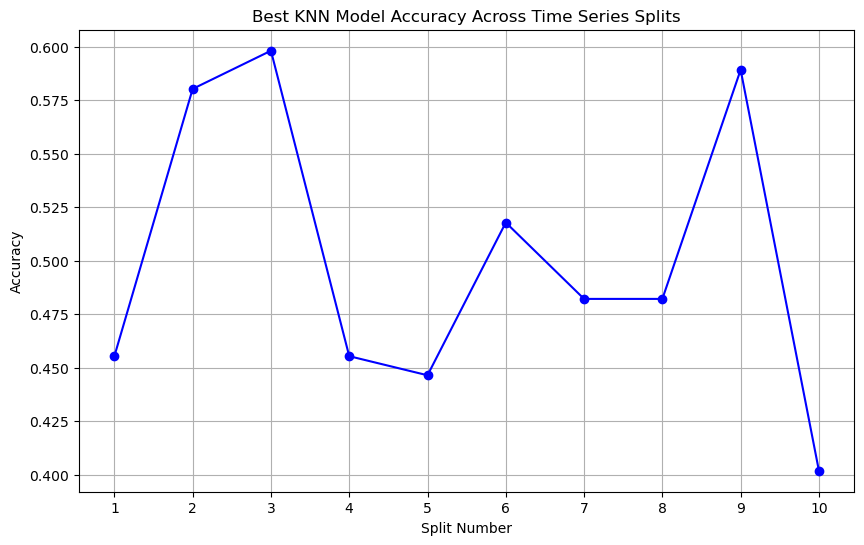

In [26]:
# Plot accuracy for each split
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title("Best KNN Model Accuracy Across Time Series Splits")
plt.xlabel("Split Number")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(accuracies) + 1))
plt.grid(True)
plt.show()

## Train Test Model (last two month)

In [30]:
df_last_60 = df.iloc[-55:]
tscv = TimeSeriesSplit(10)


### Dynamic Time Warping (DTW):
- DTW is a distance metric that calculates the optimal alignment between two sequences, allowing for variations in speed and timing. 
- This is particularly useful for time-series data where similar patterns may not align because of temporal shifts.

### Dataset Selection and Dynamic Time Warping (DTW)

While the original dataset is too large to apply computationally intensive methods like **Dynamic Time Warping (DTW)**, focusing on the last **2 months of data** makes it feasible. 

The approach for the last 2-month dataset:
1. We will apply **DTW** alongside other KNN metrics (e.g., Euclidean and Manhattan distance).
2. This enables a comparative analysis of performance across different metrics and figures advantages of DTW.


### Dynamic Time Wrapping (Use for last 2 month)

In [31]:
# Define the custom DTW function
def custom_dtw(x, y):
    n, m = len(x), len(y)
    dtw_matrix = np.zeros((n + 1, m + 1))
    dtw_matrix[1:, 0] = np.inf
    dtw_matrix[0, 1:] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(x[i - 1] - y[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    return dtw_matrix[n, m]


In [32]:
def train_test_model(df=df_last_60, k=5 , _metric = custom_dtw,weight='uniform'): #default DTW
    # Initialize a list to store accuracy results for each split
    accuracies = []

    # Step 4: Train a single KNN model with default parameters on each split and evaluate accuracy
    for train_index, test_index in tscv.split(df):

        # Split the data into train and test sets based on indices
        X_train, X_test = df.iloc[train_index][features], df.iloc[test_index][features]
        y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]
        
        # Apply scaling on the training data and then apply the same scaler on the test data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Apply Power Transformation on the scaled data
        power_transformer = PowerTransformer()
        X_train_transformed = power_transformer.fit_transform(X_train_scaled)
        X_test_transformed = power_transformer.transform(X_test_scaled)
        
        # Initialize KNN with parameters 
        knn_60 = KNeighborsClassifier(n_neighbors = k, metric= _metric,weights = weight)
        knn_60.fit(X_train_transformed, y_train)
        
        # Predict on test set and calculate accuracy
        y_pred = knn_60.predict(X_test_transformed)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies


In [33]:
# Accuracies Plot function
def plot_model(acc):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(acc) + 1), acc, marker='o', linestyle='-', color='b')
    plt.title("KNN Model Accuracy Across Time Series Splits")
    plt.xlabel("Split Number")
    plt.ylabel("Accuracy")
    plt.xticks(range(1, len(acc) + 1))
    plt.grid(True)
    plt.show()

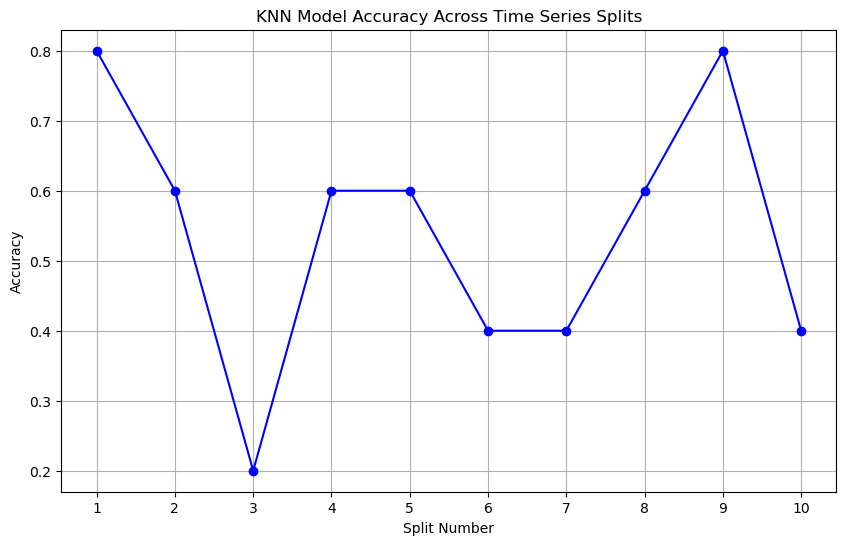

In [34]:
# Model KNN with DTW (k=3)
acc = train_test_model(k=3)
plot_model(acc)


In [37]:
def plot_accuracy(df=df_last_60, _metric = custom_dtw):
    k_values = range(1, 6)
    k_accuracies_tuned = []  # Store average accuracy for each k during tuning

    k_last_splits = []
    for k in k_values:
        split_accuracies = []
        
        for train_index, test_index in tscv.split(df):
            # Define training and testing sets
            X_train, X_test = df.iloc[train_index][features], df.iloc[test_index][features]
            y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]
            
            # Apply scaling and power transformation
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            X_train_transformed = power_transformer.fit_transform(X_train_scaled)
            X_test_transformed = power_transformer.transform(X_test_scaled)
            
            # Initialize KNN with current k-value
            knn = KNeighborsClassifier(n_neighbors=k,metric=_metric)
            knn.fit(X_train_transformed, y_train)
            
            # Predict and evaluate accuracy on test set
            y_pred = knn.predict(X_test_transformed)
            accuracy = accuracy_score(y_test, y_pred)
            split_accuracies.append(accuracy)
        
        # Calculate and store the average accuracy for this k-value
        k_last_splits.append(split_accuracies[-1:])
        k_accuracies_tuned.append(sum(split_accuracies) / len(split_accuracies))
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, k_accuracies_tuned, marker='x', linestyle='-', linewidth=3.5, color='darkorange', label='Tuned k values')
    plt.plot(k_values, k_last_splits, marker='x', linestyle='-', linewidth=1, color='gold', alpha=0.9, label='Last split')
    plt.xlabel('Split Number / k Value')
    plt.ylabel('Accuracy')
    plt.title(f'KNN with {'DTW' if _metric == custom_dtw else _metric} by k values')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

### Performance by different metrics

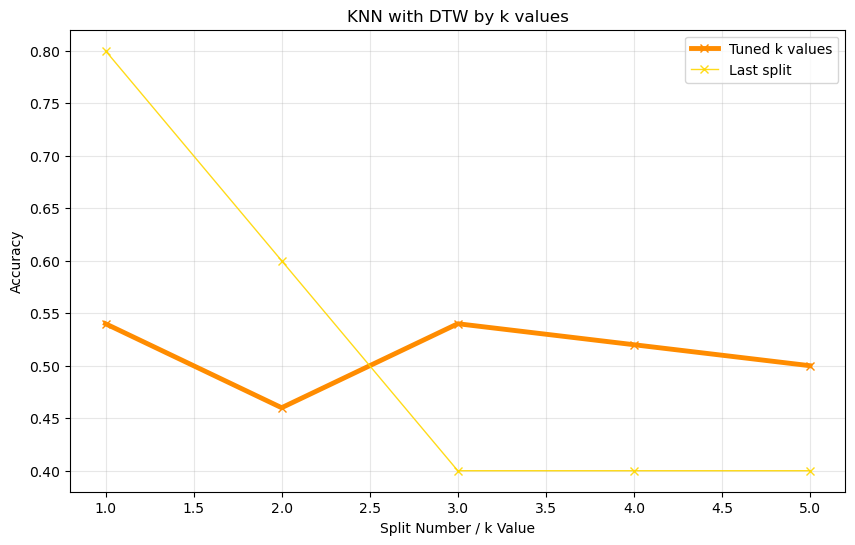

In [38]:
plot_accuracy()

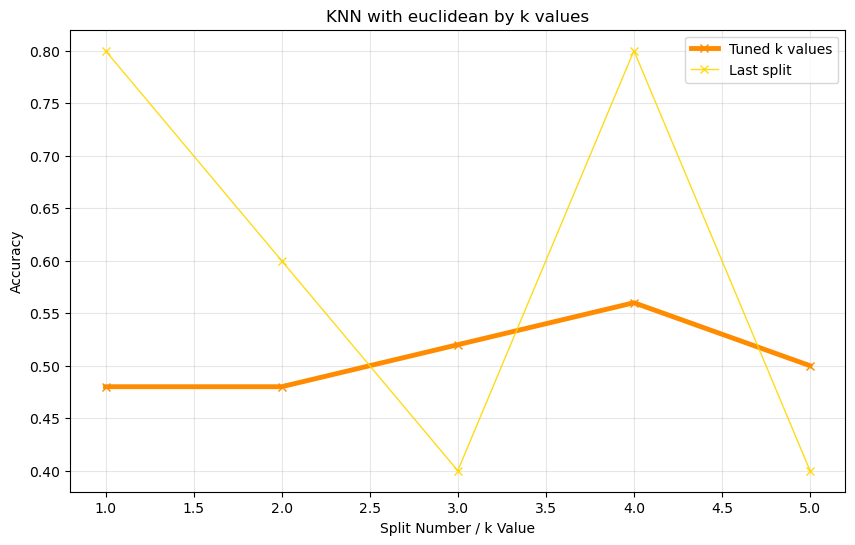

In [39]:
plot_accuracy(_metric='euclidean')

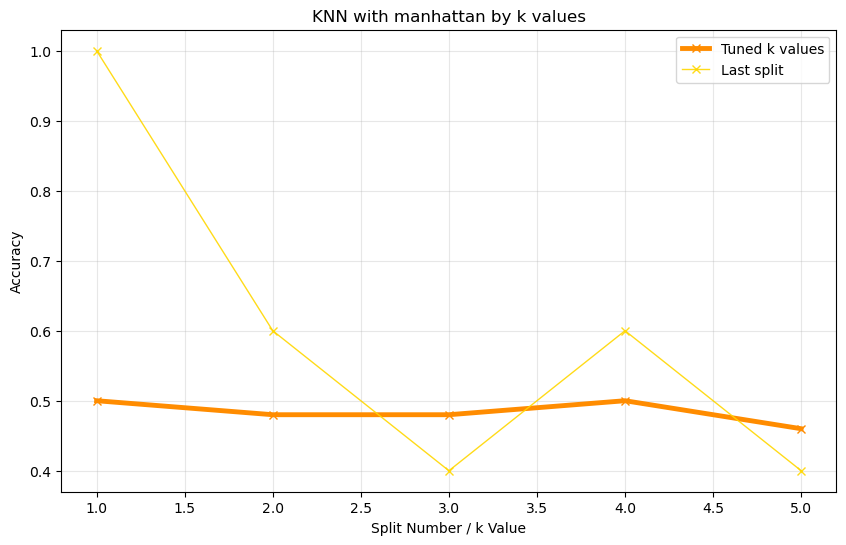

In [40]:
plot_accuracy(_metric='manhattan')

### Hyperparameter Tuning

In [41]:
# Expanded parameter grid for with k, distance metric, and weighting scheme
param_grid_expanded = {
    'n_neighbors': list(range(3,6,1)),  # Testing k from 3 to 5
    'metric': ['euclidean', 'manhattan',custom_dtw],  # Different distance metrics
    'weights': ['uniform', 'distance']     # Different weighting schemes
}
param_grid_expanded

{'n_neighbors': [3, 4, 5],
 'metric': ['euclidean', 'manhattan', <function __main__.custom_dtw(x, y)>],
 'weights': ['uniform', 'distance']}

In [42]:
# Initialize a dictionary to store accuracy for each parameter combination
grid_scores = {}

# Custom grid search implementation with expanded parameters
for k in param_grid_expanded['n_neighbors']:
    for metric in param_grid_expanded['metric']:
        for weight in param_grid_expanded['weights']:
            key = (k, metric, weight)
            grid_scores[key] = []
            
            # Perform time series split and evaluate each parameter set
            for train_index, test_index in tscv.split(df_last_60):
                X_train, X_test = df_last_60.iloc[train_index][features], df_last_60.iloc[test_index][features]
                y_train, y_test = df_last_60.iloc[train_index][target], df_last_60.iloc[test_index][target]
                
                # Scale and transform
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
                
                power_transformer = PowerTransformer()
                X_train_transformed = power_transformer.fit_transform(X_train_scaled)
                X_test_transformed = power_transformer.transform(X_test_scaled)

                # KNN model with current parameter set
                knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weight)
                knn.fit(X_train_transformed, y_train)

                # Accuracy calculation
                accuracy = accuracy_score(y_test, knn.predict(X_test_transformed))
                grid_scores[key].append(accuracy)

# Calculate average accuracy for each parameter combination
avg_expanded_scores = {key: sum(scores) / len(scores) for key, scores in grid_scores.items()}

In [43]:
# Ranked the best params by avg accuracy
sorted_scores = sorted(avg_expanded_scores.items(), key=lambda x: x[1], reverse=True)
sorted_scores[:5]

[((4, 'euclidean', 'uniform'), 0.5599999999999999),
 ((3, <function __main__.custom_dtw(x, y)>, 'uniform'), 0.54),
 ((3, <function __main__.custom_dtw(x, y)>, 'distance'), 0.54),
 ((3, 'euclidean', 'uniform'), 0.52),
 ((3, 'euclidean', 'distance'), 0.52)]

Try top 3 params

In [44]:
best_params_by_avg =  sorted_scores[0][0]
second_best_params = sorted_scores[1][0]
third_params = sorted_scores[2][0]

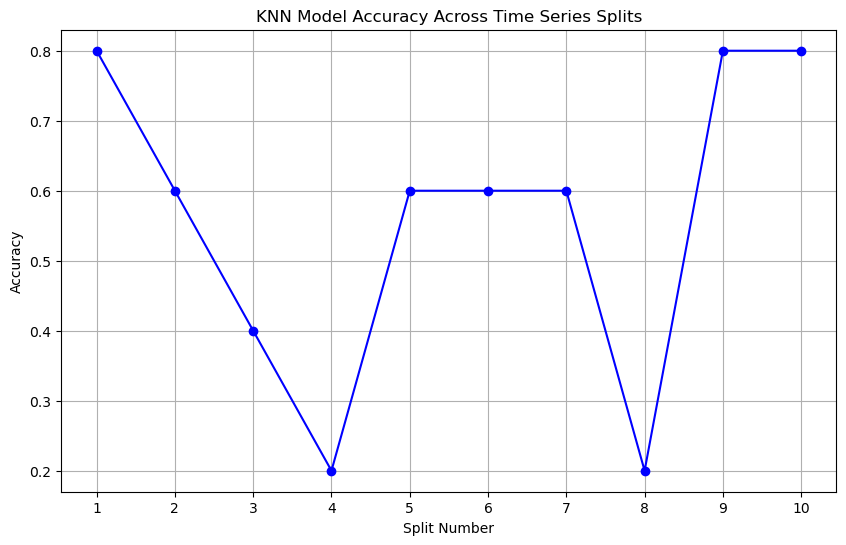

Average accuracy: 0.5599999999999999


In [45]:
# Best avg KNN
acc_best_avg = train_test_model(
    k=best_params_by_avg[0],
    _metric=best_params_by_avg[1],
    weight=best_params_by_avg[2]
)
plot_model(acc_best_avg)
print(f"Average accuracy: {sum(acc_best_avg)/len(acc_best_avg)}")


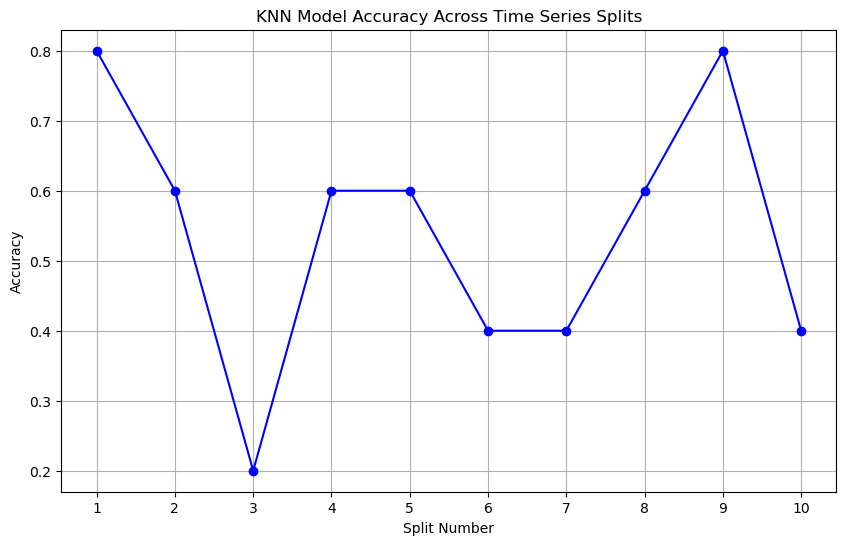

Average accuracy: 0.54


In [46]:
# 2nd Best
acc_2nd_best_avg = train_test_model(
    k=second_best_params[0],
    _metric=second_best_params[1],
    weight=second_best_params[2]
)
plot_model(acc_2nd_best_avg)
print(f"Average accuracy: {sum(acc_2nd_best_avg)/len(acc_2nd_best_avg)}")

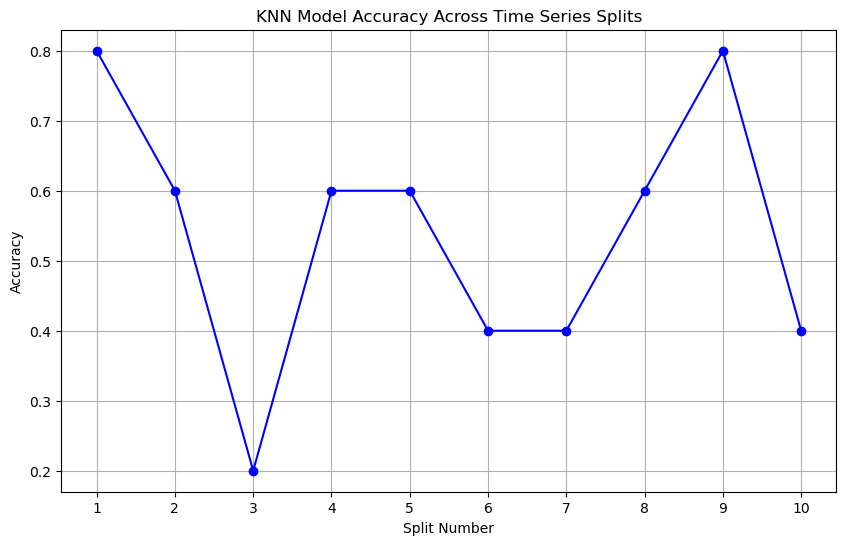

Average accuracy: 0.54


In [47]:
# 3rd best model
acc_3rd_best_avg = train_test_model(
    k=third_params[0],
    _metric=third_params[1],
    weight=third_params[2]
)
plot_model(acc_3rd_best_avg)
print(f"Average accuracy: {sum(acc_3rd_best_avg)/len(acc_3rd_best_avg)}")

Since the accuracy of 3rd best params is identical to the 2nd best (the parameters of 2nd and 3rd only differs by weight), we will use first 2 model to run backtesting

Best DTW on test

In [91]:
df_test= pd.read_csv("test.csv").tail(19)

In [92]:
df_test.reset_index(inplace=True)

In [93]:
df_test.drop(columns=["index"],inplace=True)

In [94]:
df_test['Date'] = pd.to_datetime(df_test['Date'], errors='coerce')

In [95]:
df_test = df_test.rename(columns={'F_Close_pred_class': 'F_prediction'})

In [96]:
## Remove open, close, high, low, vol columns
open_cols = [col for col in df_test.columns if '_Open' in col]
close_cols = [col for col in df_test.columns if '_Close' in col]
high_cols = [col for col in df_test.columns if '_High' in col]
low_cols = [col for col in df_test.columns if '_Low' in col]
vol_cols = [col for col in df_test.columns if '_Volume' in col]

df_test = df_test.drop(columns=open_cols)
df_test = df_test.drop(columns=close_cols)
df_test = df_test.drop(columns=high_cols)
df_test = df_test.drop(columns=low_cols)
df_test = df_test.drop(columns=vol_cols)


In [97]:
# Setting a threshold for multicollinearity to identify highly correlated features
threshold = 1
# Identifying highly correlated pairs
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Remove self-correlation (1.0)

# Identify columns to drop to reduce multicollinearity
columns_to_drop = set()
for (feature1, feature2), corr_value in high_corr_pairs.items():
    if corr_value > threshold:
        # Only add feature2 to drop if feature1 has not already been marked for removal
        if feature1 not in columns_to_drop:
            columns_to_drop.add(feature2)

# Dropping the identified columns from the dataset
df_test = df_test.drop(columns=columns_to_drop)

In [ ]:
X_train, X_test = df_last_60[features],df_test[features]
y_train, y_test = df_last_60[target], df_test[target]

# Scale and transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

power_transformer = PowerTransformer()
X_train_transformed = power_transformer.fit_transform(X_train_scaled)
X_test_transformed = power_transformer.transform(X_test_scaled)

# KNN model with current parameter set
knn = KNeighborsClassifier(n_neighbors=3, metric=custom_dtw, weights="uniform")
knn.fit(X_train_transformed, y_train)

y_pred =  knn.predict(X_test_transformed)
# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
    


In [102]:
accuracy

0.7894736842105263

In [103]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

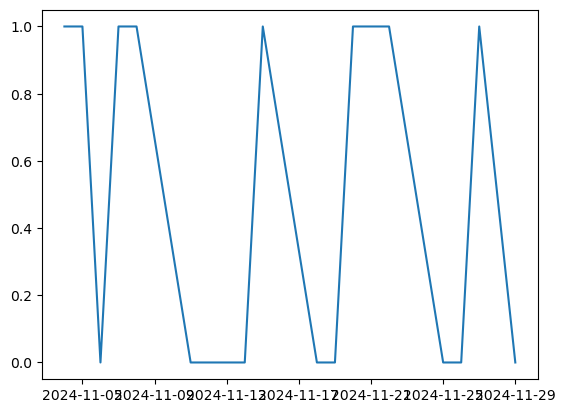

In [ ]:
plt.plot(df_test['Date'],y_test)
plt.show()


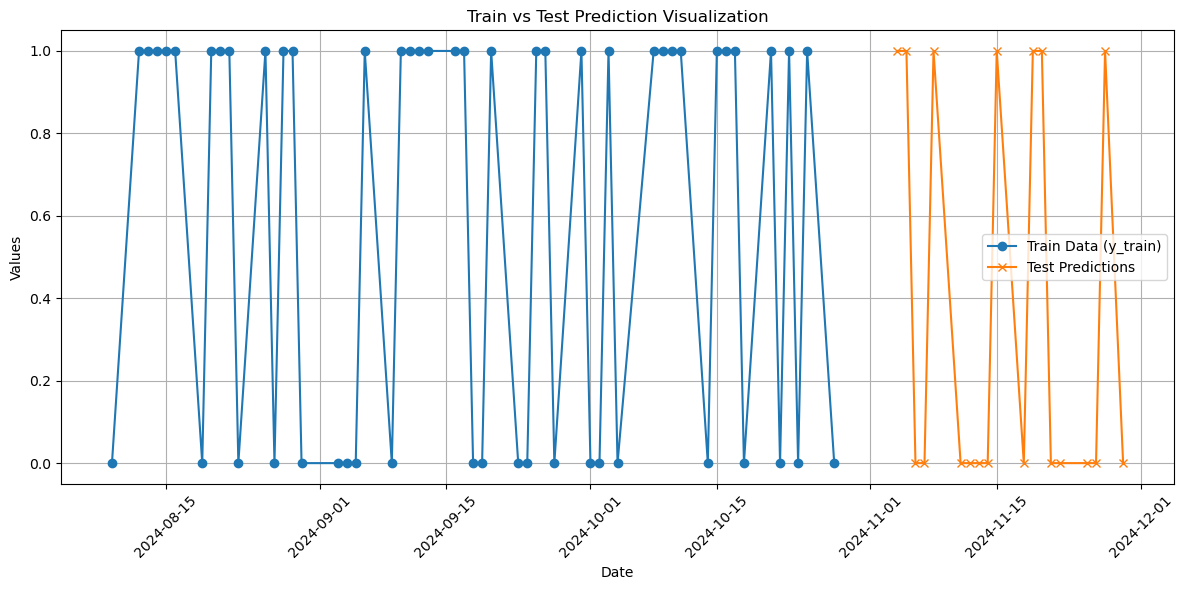

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(df_last_60['Date'], df_last_60[target], label='Train Data (y_train)', marker='o')

# Extend the Date axis to include df3 and plot y_pred
plt.plot(df_test['Date'], y_pred, label='Test Predictions ', marker='x')

# Labels and Legends
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Train vs Test Prediction Visualization')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### Backtesting with best models

In [104]:
# Setup for backtesting with 5 forecast lengths 
num_test_sets = 11
test_set_size = 5  # Each test set has 5 days
forecast_lengths = [1, 2, 3, 4, 5]  # Forecast lengths
results = {f"Forecast_{length}": [] for length in forecast_lengths}

df_bt = df_last_60.copy()

# Prepare lagged features
lagged_features = {}
for col in df_bt.columns:
    for lag in range(1, 4):  # Create 3 lagged features
        lagged_features[f'{col}_lag_{lag}'] = df_bt[col].shift(lag)

# Concatenate lagged features to the back test data
lagged_features_df = pd.DataFrame(lagged_features)
df_bt = pd.concat([df_bt, lagged_features_df], axis=1)

# Drop rows with NaN due to lagging
df_bt = df_bt.dropna().reset_index(drop=True)

In [106]:
df_bt.tail()

,Date,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,CADUSD=X_SMA,CADUSD=X_EMA,CADUSD=X_change_in_price,CADUSD=X_RSI,...,F_ROC_lag_3,F_PVT_lag_1,F_PVT_lag_2,F_PVT_lag_3,F_Bollinger_Upper_lag_1,F_Bollinger_Upper_lag_2,F_Bollinger_Upper_lag_3,F_prediction_lag_1,F_prediction_lag_2,F_prediction_lag_3
47,2024-10-22 00:00:00+00:00,-0.001776,0.000000,0.001776,0.000308,0.001477,0.733303,0.730472,-0.001776,22.129881,...,4.829538,6.670566e+07,6.751845e+07,6.744778e+07,11.159514,11.159514,11.124970,1.0,0.0,1.0
48,2024-10-23 00:00:00+00:00,0.000905,0.000905,0.000000,0.000245,0.001477,0.732536,0.729835,0.000905,28.290869,...,3.255818,6.779642e+07,6.670566e+07,6.751845e+07,11.195281,11.159514,11.159514,0.0,1.0,0.0
49,2024-10-24 00:00:00+00:00,-0.001072,0.000000,0.001072,0.000245,0.001513,0.731416,0.729157,-0.001072,25.529720,...,3.816800,6.762839e+07,6.779642e+07,6.670566e+07,11.223237,11.195281,11.159514,1.0,0.0,1.0
50,2024-10-25 00:00:00+00:00,-0.000866,0.000000,0.000866,0.000245,0.001406,0.730423,0.728461,-0.000866,23.401396,...,6.315788,6.835647e+07,6.762839e+07,6.779642e+07,11.282170,11.223237,11.195281,0.0,1.0,0.0
51,2024-10-28 00:00:00+00:00,-0.002197,0.000000,0.002197,0.000245,0.001293,0.729302,0.727622,-0.002197,18.810221,...,4.635769,6.776479e+07,6.835647e+07,6.762839e+07,11.312438,11.282170,11.223237,1.0,0.0,1.0


Model with a parameters set: (3, custom_dtw, 'uniform')

In [60]:
# Define features and labels
X = df_bt.select_dtypes(include=[np.number]).drop(columns=[target])
y = df_bt[target]

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally apply power transformation for Gaussian-like data
power_transformer = PowerTransformer()
X_scaled = power_transformer.fit_transform(X_scaled)


In [ ]:

# Backtesting setup
results = {f"Forecast_{length}": [] for length in forecast_lengths}

# Backtesting loop
for length in forecast_lengths:
    for i in range(num_test_sets):
        # Define training and testing indices
        train_end = i * test_set_size
        test_start = train_end
        test_end = test_start + test_set_size

        # Train-test split
        X_train, X_test = X_scaled[:train_end], X_scaled[test_start:test_end]
        y_train, y_test = y[:train_end], y[test_start:test_end]

        # Train the KNN model
        knn = KNeighborsClassifier(n_neighbors=3, metric = custom_dtw, weights = "uniform")
        if len(X_train) > 0:  # Ensure there's training data
            knn.fit(X_train, y_train)

            # Predict for the forecast length
            y_pred = knn.predict(X_test[:length])

            # Check forecast length validity
            actual_length = min(length, len(y_test))
            y_pred = y_pred[:actual_length]
            y_test_subset = y_test[:actual_length]

            # Compute accuracy
            accuracy = accuracy_score(y_test_subset, y_pred)

            # Store the accuracy
            results[f"Forecast_{length}"].append(accuracy)

# Convert results to a DataFrame
backtest_results = pd.DataFrame(results)

# Display or save the results
print(backtest_results)

   Forecast_1  Forecast_2  Forecast_3  Forecast_4  Forecast_5
0         1.0         1.0    0.666667        0.75         0.6
1         1.0         0.5    0.666667        0.50         0.4
2         1.0         0.5    0.666667        0.50         0.6
3         1.0         1.0    1.000000        0.75         0.8
4         0.0         0.5    0.333333        0.25         0.4
5         0.0         0.5    0.333333        0.25         0.4
6         0.0         0.5    0.333333        0.25         0.2
7         1.0         0.5    0.666667        0.75         0.8
8         0.0         0.5    0.333333        0.50         0.4
9         1.0         1.0    1.000000        1.00         1.0


Since the lag features add more columns to the data, it makes much more time to run the model. The big O notation for DTW depends on the size of data $O(n^2)$

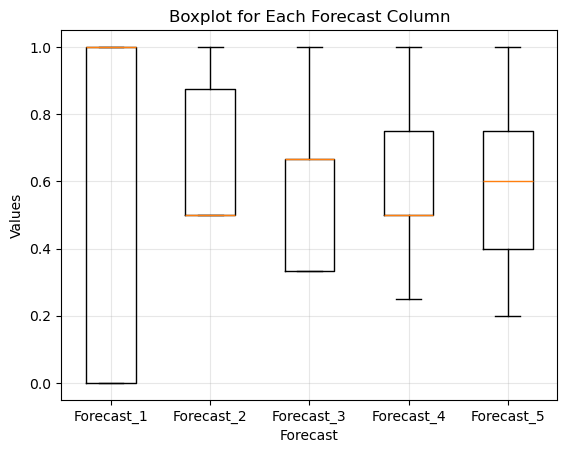

In [266]:
plt.boxplot(backtest_results, tick_labels=backtest_results.columns, vert=True)
plt.title("Boxplot for Each Forecast Column")
plt.xlabel("Forecast")
plt.ylabel("Values")
plt.grid(alpha=0.3)
plt.show()

Model with a parameters set: (4, 'euclidean', 'uniform')

In [262]:
# Backtesting setup
results = {f"Forecast_{length}": [] for length in forecast_lengths}

# Backtesting loop
for length in forecast_lengths:
    for i in range(num_test_sets):
        # Define training and testing indices
        train_end = i * test_set_size
        test_start = train_end
        test_end = test_start + test_set_size

        # Train-test split
        X_train, X_test = X_scaled[:train_end], X_scaled[test_start:test_end]
        y_train, y_test = y[:train_end], y[test_start:test_end]

        # Train the KNN model
        knn = KNeighborsClassifier(n_neighbors=4, metric = "euclidean", weights = "uniform")
        if len(X_train) > 0:  # Ensure there's training data
            knn.fit(X_train, y_train)

            # Predict for the forecast length
            y_pred = knn.predict(X_test[:length])

            # Check forecast length validity
            actual_length = min(length, len(y_test))
            y_pred = y_pred[:actual_length]
            y_test_subset = y_test[:actual_length]

            # Compute accuracy
            accuracy = accuracy_score(y_test_subset, y_pred)

            # Store the accuracy
            results[f"Forecast_{length}"].append(accuracy)

# Convert results to a DataFrame
backtest_results_2 = pd.DataFrame(results)

# Display or save the results
print(backtest_results_2)

   Forecast_1  Forecast_2  Forecast_3  Forecast_4  Forecast_5
0         1.0         1.0    0.666667        0.75         0.6
1         0.0         0.0    0.333333        0.50         0.6
2         1.0         0.5    0.666667        0.50         0.4
3         1.0         1.0    1.000000        1.00         0.8
4         0.0         0.5    0.333333        0.25         0.4
5         0.0         0.5    0.333333        0.50         0.6
6         0.0         0.5    0.333333        0.25         0.2
7         1.0         0.5    0.666667        0.75         0.8
8         0.0         0.5    0.333333        0.50         0.4
9         0.0         0.5    0.500000        0.50         0.5


Forecast_1    0.400000
Forecast_2    0.550000
Forecast_3    0.516667
Forecast_4    0.550000
Forecast_5    0.530000
dtype: float64


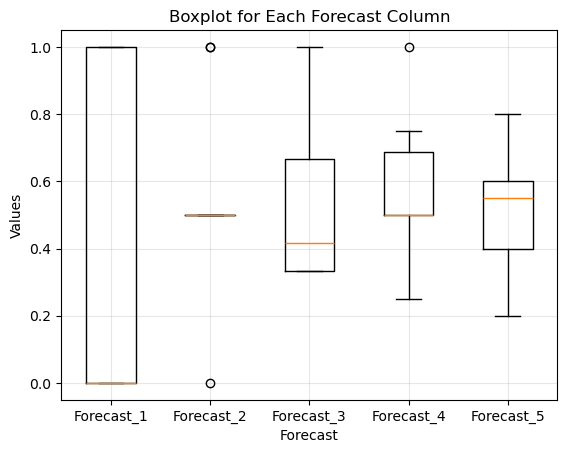

In [265]:
col_averages = backtest_results_2.mean(axis=0)
# Print the col averages
print(col_averages)


plt.boxplot(backtest_results_2, tick_labels=backtest_results_2.columns, vert=True)
plt.title("Boxplot for Each Forecast Column")
plt.xlabel("Forecast")
plt.ylabel("Values")
plt.grid(alpha=0.3)
plt.show()

While **Model 1** (*k=4, Euclidean distance, uniform weights*) achieved higher accuracy after hyperparameter tuning, **Model 2** (*k=3, DTW distance, uniform weights*) did better performance in backtesting.

### Explanation:
1. **Accuracy**:
   - Model 1 is slightly higher in overall accuracy with the Euclidean metric, which performs well in datasets with more stationary features.

2. **Backtesting Performance**:
   - Model 2, employing Dynamic Time Warping (DTW), aligns better with sequences that exhibit variability or non-linear temporal patterns, making it more suitable for time-series backtesting tasks
   - DTW is computationally more intensive, with much longer running time compared to Model 1.

3. **Trade-offs**:
   - **Model 1** is faster and effective in scenarios where temporal relationships are not critical.
   - **Model 2** is ideal for sequential data, where capturing temporal alignment is key to achieving robust performance.

In conclusion, while Model 1 is slightly better for static evaluations, Model 2 provides a stronger framework for timeseries data, as reflected in its superior backtesting results.
